**Eskinder Tsegaye Defar**

**ID: 20215511**

Statistical Machine Learning

Project Title: **Predicting Total Market Value for Football dataset from Transfermarkt**

**Step-1) Data Loading and Preprocesssing**

Importing Pandas library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Data Collection

In [ ]:
# load datasets
players= pd.read_csv('C:/Users/Dell Inspiron/Downloads/players.csv')
competitions= pd.read_csv('C:/Users/Dell Inspiron/Downloads/competitions.csv')
games= pd.read_csv('C:/Users/Dell Inspiron/Downloads/games.csv')
clubs= pd.read_csv('C:/Users/Dell Inspiron/Downloads/clubs.csv')
appearances= pd.read_csv('C:/Users/Dell Inspiron/Downloads/appearances.csv')


# Data Cleaning:

In [ ]:
players.head(10)

,player_id,last_season,current_club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url
0,214258,2014,3729,andrey-naletov,Andrey Naletov,Russia,Russia,1996-03-31,Defender,Centre-Back,Right,179,NaN,23000.0,https://www.transfermarkt.co.uk/andrey-naletov...
1,45247,2014,1162,damien-perquis,Damien Perquis,France,France,1986-03-08,Goalkeeper,Goalkeeper,Right,186,360000.0,900000.0,https://www.transfermarkt.co.uk/damien-perquis...
2,61389,2014,3729,ivan-lozenkov,Ivan Lozenkov,UdSSR,Russia,1984-04-14,Defender,Centre-Back,Left,182,NaN,270000.0,https://www.transfermarkt.co.uk/ivan-lozenkov/...
3,217036,2014,3729,aleksandr-zakarlyuka,Aleksandr Zakarlyuka,Estonia,Russia,1995-06-24,Midfield,Central Midfield,Right,178,203000.0,203000.0,https://www.transfermarkt.co.uk/aleksandr-zaka...
4,97205,2014,28095,nikita-bezlikhotnov,Nikita Bezlikhotnov,UdSSR,Russia,1990-08-19,Attack,Right Winger,Right,179,225000.0,675000.0,https://www.transfermarkt.co.uk/nikita-bezlikh...
5,57208,2014,1162,felipe-saad,Felipe Saad,Brazil,Brazil,1983-09-11,Defender,Centre-Back,Left,187,NaN,1080000.0,https://www.transfermarkt.co.uk/felipe-saad/pr...
6,140799,2014,403,jonas-heymans,Jonas Heymans,Belgium,Belgium,1993-02-06,Defender,Left-Back,Left,182,NaN,450000.0,https://www.transfermarkt.co.uk/jonas-heymans/...
7,55472,2014,276,rafael-marques,Rafael Marques,Brazil,Brazil,1983-09-21,Defender,Centre-Back,Right,187,NaN,1620000.0,https://www.transfermarkt.co.uk/rafael-marques...
8,37633,2014,276,guillermo-rodriguez,Guillermo Rodriguez,Uruguay,Uruguay,1984-03-21,Defender,Centre-Back,Left,185,45000.0,2610000.0,https://www.transfermarkt.co.uk/guillermo-rodr...
9,76902,2014,276,fernandinho,Fernandinho,Brazil,Brazil,1985-11-25,Attack,Left Winger,Left,173,135000.0,1800000.0,https://www.transfermarkt.co.uk/fernandinho/pr...


In [ ]:
#Replace missing values in market value in group player with their median value.
#Create copy of DataFrame
data_new = players.copy()
data_new = data_new.fillna(data_new["market_value_in_gbp"].median())
#Updated DataFrame
data_new.head(10)

,player_id,last_season,current_club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url
0,214258,2014,3729,andrey-naletov,Andrey Naletov,Russia,Russia,1996-03-31,Defender,Centre-Back,Right,179,338000.0,23000.0,https://www.transfermarkt.co.uk/andrey-naletov...
1,45247,2014,1162,damien-perquis,Damien Perquis,France,France,1986-03-08,Goalkeeper,Goalkeeper,Right,186,360000.0,900000.0,https://www.transfermarkt.co.uk/damien-perquis...
2,61389,2014,3729,ivan-lozenkov,Ivan Lozenkov,UdSSR,Russia,1984-04-14,Defender,Centre-Back,Left,182,338000.0,270000.0,https://www.transfermarkt.co.uk/ivan-lozenkov/...
3,217036,2014,3729,aleksandr-zakarlyuka,Aleksandr Zakarlyuka,Estonia,Russia,1995-06-24,Midfield,Central Midfield,Right,178,203000.0,203000.0,https://www.transfermarkt.co.uk/aleksandr-zaka...
4,97205,2014,28095,nikita-bezlikhotnov,Nikita Bezlikhotnov,UdSSR,Russia,1990-08-19,Attack,Right Winger,Right,179,225000.0,675000.0,https://www.transfermarkt.co.uk/nikita-bezlikh...
5,57208,2014,1162,felipe-saad,Felipe Saad,Brazil,Brazil,1983-09-11,Defender,Centre-Back,Left,187,338000.0,1080000.0,https://www.transfermarkt.co.uk/felipe-saad/pr...
6,140799,2014,403,jonas-heymans,Jonas Heymans,Belgium,Belgium,1993-02-06,Defender,Left-Back,Left,182,338000.0,450000.0,https://www.transfermarkt.co.uk/jonas-heymans/...
7,55472,2014,276,rafael-marques,Rafael Marques,Brazil,Brazil,1983-09-21,Defender,Centre-Back,Right,187,338000.0,1620000.0,https://www.transfermarkt.co.uk/rafael-marques...
8,37633,2014,276,guillermo-rodriguez,Guillermo Rodriguez,Uruguay,Uruguay,1984-03-21,Defender,Centre-Back,Left,185,45000.0,2610000.0,https://www.transfermarkt.co.uk/guillermo-rodr...
9,76902,2014,276,fernandinho,Fernandinho,Brazil,Brazil,1985-11-25,Attack,Left Winger,Left,173,135000.0,1800000.0,https://www.transfermarkt.co.uk/fernandinho/pr...


In [ ]:
#Calculate the age of players from their date of birth
from datetime import date
data_new["date_of_birth"] = pd.to_datetime(data_new["date_of_birth"])
data_new["date_of_birth"] = data_new["date_of_birth"].apply(lambda x : (pd.datetime.now().year - x.year))
data_new.rename(columns = {'date_of_birth':'Age'}, inplace = True)
data_new.head(10)

C:\Users\DELLIN~1\AppData\Local\Temp/ipykernel_9668/3998685953.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_new["date_of_birth"] = data_new["date_of_birth"].apply(lambda x : (pd.datetime.now().year - x.year))


,player_id,last_season,current_club_id,name,pretty_name,country_of_birth,country_of_citizenship,Age,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url
0,214258,2014,3729,andrey-naletov,Andrey Naletov,Russia,Russia,26,Defender,Centre-Back,Right,179,338000.0,23000.0,https://www.transfermarkt.co.uk/andrey-naletov...
1,45247,2014,1162,damien-perquis,Damien Perquis,France,France,36,Goalkeeper,Goalkeeper,Right,186,360000.0,900000.0,https://www.transfermarkt.co.uk/damien-perquis...
2,61389,2014,3729,ivan-lozenkov,Ivan Lozenkov,UdSSR,Russia,38,Defender,Centre-Back,Left,182,338000.0,270000.0,https://www.transfermarkt.co.uk/ivan-lozenkov/...
3,217036,2014,3729,aleksandr-zakarlyuka,Aleksandr Zakarlyuka,Estonia,Russia,27,Midfield,Central Midfield,Right,178,203000.0,203000.0,https://www.transfermarkt.co.uk/aleksandr-zaka...
4,97205,2014,28095,nikita-bezlikhotnov,Nikita Bezlikhotnov,UdSSR,Russia,32,Attack,Right Winger,Right,179,225000.0,675000.0,https://www.transfermarkt.co.uk/nikita-bezlikh...
5,57208,2014,1162,felipe-saad,Felipe Saad,Brazil,Brazil,39,Defender,Centre-Back,Left,187,338000.0,1080000.0,https://www.transfermarkt.co.uk/felipe-saad/pr...
6,140799,2014,403,jonas-heymans,Jonas Heymans,Belgium,Belgium,29,Defender,Left-Back,Left,182,338000.0,450000.0,https://www.transfermarkt.co.uk/jonas-heymans/...
7,55472,2014,276,rafael-marques,Rafael Marques,Brazil,Brazil,39,Defender,Centre-Back,Right,187,338000.0,1620000.0,https://www.transfermarkt.co.uk/rafael-marques...
8,37633,2014,276,guillermo-rodriguez,Guillermo Rodriguez,Uruguay,Uruguay,38,Defender,Centre-Back,Left,185,45000.0,2610000.0,https://www.transfermarkt.co.uk/guillermo-rodr...
9,76902,2014,276,fernandinho,Fernandinho,Brazil,Brazil,37,Attack,Left Winger,Left,173,135000.0,1800000.0,https://www.transfermarkt.co.uk/fernandinho/pr...


In [ ]:
#Replace the missing position ('0') with Attack
data_new['position'].replace('0', 'Attack', inplace=True)
data_new.head(10)

,player_id,last_season,current_club_id,name,pretty_name,country_of_birth,country_of_citizenship,Age,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url
0,214258,2014,3729,andrey-naletov,Andrey Naletov,Russia,Russia,26,Defender,Centre-Back,Right,179,338000.0,23000.0,https://www.transfermarkt.co.uk/andrey-naletov...
1,45247,2014,1162,damien-perquis,Damien Perquis,France,France,36,Goalkeeper,Goalkeeper,Right,186,360000.0,900000.0,https://www.transfermarkt.co.uk/damien-perquis...
2,61389,2014,3729,ivan-lozenkov,Ivan Lozenkov,UdSSR,Russia,38,Defender,Centre-Back,Left,182,338000.0,270000.0,https://www.transfermarkt.co.uk/ivan-lozenkov/...
3,217036,2014,3729,aleksandr-zakarlyuka,Aleksandr Zakarlyuka,Estonia,Russia,27,Midfield,Central Midfield,Right,178,203000.0,203000.0,https://www.transfermarkt.co.uk/aleksandr-zaka...
4,97205,2014,28095,nikita-bezlikhotnov,Nikita Bezlikhotnov,UdSSR,Russia,32,Attack,Right Winger,Right,179,225000.0,675000.0,https://www.transfermarkt.co.uk/nikita-bezlikh...
5,57208,2014,1162,felipe-saad,Felipe Saad,Brazil,Brazil,39,Defender,Centre-Back,Left,187,338000.0,1080000.0,https://www.transfermarkt.co.uk/felipe-saad/pr...
6,140799,2014,403,jonas-heymans,Jonas Heymans,Belgium,Belgium,29,Defender,Left-Back,Left,182,338000.0,450000.0,https://www.transfermarkt.co.uk/jonas-heymans/...
7,55472,2014,276,rafael-marques,Rafael Marques,Brazil,Brazil,39,Defender,Centre-Back,Right,187,338000.0,1620000.0,https://www.transfermarkt.co.uk/rafael-marques...
8,37633,2014,276,guillermo-rodriguez,Guillermo Rodriguez,Uruguay,Uruguay,38,Defender,Centre-Back,Left,185,45000.0,2610000.0,https://www.transfermarkt.co.uk/guillermo-rodr...
9,76902,2014,276,fernandinho,Fernandinho,Brazil,Brazil,37,Attack,Left Winger,Left,173,135000.0,1800000.0,https://www.transfermarkt.co.uk/fernandinho/pr...


In [ ]:
data_new.rename(columns = {'pretty_name':'Name'}, inplace = True)
#Dropping columns that will usefull for prediction of market value
players=data_new.drop(["current_club_id","name","country_of_citizenship","url"],axis =1 )
players.head(10)

,player_id,last_season,Name,country_of_birth,Age,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp
0,214258,2014,Andrey Naletov,Russia,26,Defender,Centre-Back,Right,179,338000.0,23000.0
1,45247,2014,Damien Perquis,France,36,Goalkeeper,Goalkeeper,Right,186,360000.0,900000.0
2,61389,2014,Ivan Lozenkov,UdSSR,38,Defender,Centre-Back,Left,182,338000.0,270000.0
3,217036,2014,Aleksandr Zakarlyuka,Estonia,27,Midfield,Central Midfield,Right,178,203000.0,203000.0
4,97205,2014,Nikita Bezlikhotnov,UdSSR,32,Attack,Right Winger,Right,179,225000.0,675000.0
5,57208,2014,Felipe Saad,Brazil,39,Defender,Centre-Back,Left,187,338000.0,1080000.0
6,140799,2014,Jonas Heymans,Belgium,29,Defender,Left-Back,Left,182,338000.0,450000.0
7,55472,2014,Rafael Marques,Brazil,39,Defender,Centre-Back,Right,187,338000.0,1620000.0
8,37633,2014,Guillermo Rodriguez,Uruguay,38,Defender,Centre-Back,Left,185,45000.0,2610000.0
9,76902,2014,Fernandinho,Brazil,37,Attack,Left Winger,Left,173,135000.0,1800000.0


In [ ]:
appearances=appearances.drop(["appearance_id"],axis =1 )
appearances.head(10)

,player_id,game_id,competition_id,player_club_id,goals,assists,minutes_played,yellow_cards,red_cards
0,52453,2483937.0,RU1,28095,0,0,90,0,0
1,67064,2479929.0,RU1,28095,0,0,90,0,0
2,67064,2483937.0,RU1,28095,0,0,90,0,0
3,67064,2484582.0,RU1,28095,0,0,55,0,0
4,67064,2485965.0,RU1,28095,0,0,90,0,0
5,67064,2487345.0,RU1,28095,0,0,90,1,0
6,67064,2498464.0,RU1,28095,0,0,90,0,0
7,67064,2500260.0,RU1,28095,0,1,19,0,0
8,67064,2506733.0,RU1,28095,1,0,90,1,0
9,67064,2508366.0,RU1,28095,0,0,2,0,0


# Merge the Dataset of Players and Appearances

In [ ]:
player_list = pd.merge(players,appearances,on="player_id")
player_list.head(10)

,player_id,last_season,Name,country_of_birth,Age,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,game_id,competition_id,player_club_id,goals,assists,minutes_played,yellow_cards,red_cards
0,214258,2014,Andrey Naletov,Russia,26,Defender,Centre-Back,Right,179,338000.0,23000.0,2537239.0,RU1,3729,0,0,90,1,0
1,61389,2014,Ivan Lozenkov,UdSSR,38,Defender,Centre-Back,Left,182,338000.0,270000.0,2485967.0,RU1,3729,0,0,90,0,0
2,61389,2014,Ivan Lozenkov,UdSSR,38,Defender,Centre-Back,Left,182,338000.0,270000.0,2487344.0,RU1,3729,0,0,90,0,0
3,61389,2014,Ivan Lozenkov,UdSSR,38,Defender,Centre-Back,Left,182,338000.0,270000.0,2489339.0,RU1,3729,0,0,90,1,0
4,61389,2014,Ivan Lozenkov,UdSSR,38,Defender,Centre-Back,Left,182,338000.0,270000.0,2493787.0,RU1,3729,0,0,90,0,0
5,61389,2014,Ivan Lozenkov,UdSSR,38,Defender,Centre-Back,Left,182,338000.0,270000.0,2498463.0,RU1,3729,0,0,45,0,0
6,61389,2014,Ivan Lozenkov,UdSSR,38,Defender,Centre-Back,Left,182,338000.0,270000.0,2500264.0,RU1,3729,0,0,90,1,0
7,61389,2014,Ivan Lozenkov,UdSSR,38,Defender,Centre-Back,Left,182,338000.0,270000.0,2500984.0,RU1,3729,0,0,45,1,0
8,61389,2014,Ivan Lozenkov,UdSSR,38,Defender,Centre-Back,Left,182,338000.0,270000.0,2508364.0,RU1,3729,0,0,90,0,0
9,61389,2014,Ivan Lozenkov,UdSSR,38,Defender,Centre-Back,Left,182,338000.0,270000.0,2509352.0,RU1,3729,0,0,90,1,0


In [ ]:
player_list= player_list.groupby(['Name','Age','player_id', 'last_season','position','sub_position'])['goals','assists','market_value_in_gbp','highest_market_value_in_gbp','minutes_played','yellow_cards','red_cards'].sum().reset_index()
player_list.head(10)

C:\Users\DELLIN~1\AppData\Local\Temp/ipykernel_9668/537197158.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_list= player_list.groupby(['Name','Age','player_id', 'last_season','position','sub_position'])['goals','assists','market_value_in_gbp','highest_market_value_in_gbp','minutes_played','yellow_cards','red_cards'].sum().reset_index()


,Name,Age,player_id,last_season,position,sub_position,goals,assists,market_value_in_gbp,highest_market_value_in_gbp,minutes_played,yellow_cards,red_cards
0,Alpha Bdul Razak,32,339560,2014,Attack,midfield,0,0,338000.0,9.000000e+04,11,0,0
1,A J Soares,34,176850,2016,Defender,Centre-Back,1,0,2028000.0,1.620000e+06,421,2,0
2,Aaron Appindangoye,30,254249,2021,Defender,Centre-Back,0,0,40500000.0,9.720000e+07,5249,9,0
3,Aaron Bastiaans,20,578459,2020,Attack,Left Winger,1,0,180000.0,1.800000e+05,16,0,0
4,Aaron Boupendza,26,427605,2020,Attack,Centre-Forward,22,1,233100000.0,2.830500e+08,2586,7,0
5,Aaron Chapman,32,270571,2020,Goalkeeper,Goalkeeper,0,0,1080000.0,1.350000e+06,447,0,0
6,Aaron Comrie,25,360102,2018,Defender,Right-Back,0,0,3780000.0,3.780000e+06,1114,2,0
7,Aaron Connolly,22,434207,2020,Attack,Centre-Forward,6,3,277200000.0,2.772000e+08,2214,1,0
8,Aaron Cresswell,33,92571,2021,Defender,Left-Back,9,33,957600000.0,2.872800e+09,23134,32,0
9,Aaron Dhondt,27,351390,2016,Attack,Second Striker,0,0,676000.0,4.500000e+05,11,0,0


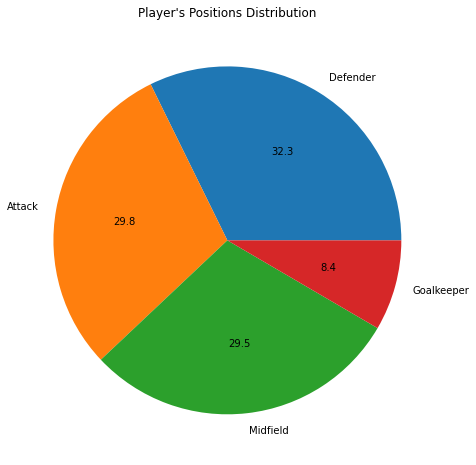

In [ ]:
plt.figure(figsize=(8,8))
loc=player_list.position.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

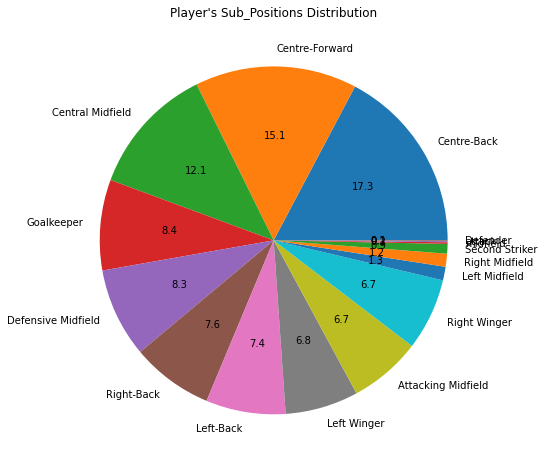

In [ ]:
plt.figure(figsize=(8,8))
loc=player_list.sub_position.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Sub_Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

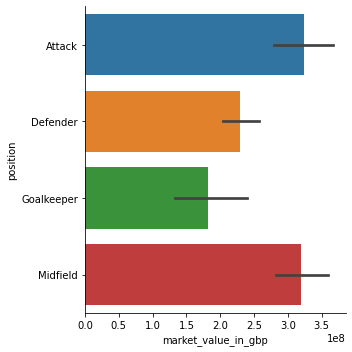

In [ ]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="position", x="market_value_in_gbp", kind="bar",  data=player_list)
plt.show()

<Figure size 2000x2000 with 0 Axes>

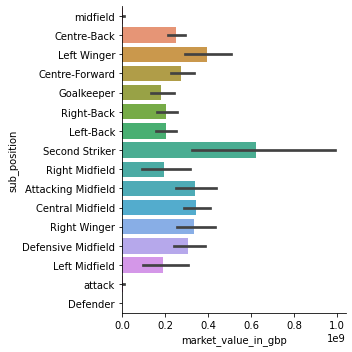

In [ ]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="sub_position", x="market_value_in_gbp", kind="bar",  data=player_list)
plt.show()

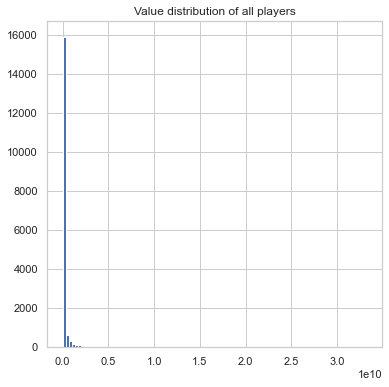

In [ ]:
plt.figure(1, figsize=(6,6))
sns.set(style="whitegrid")
plt.hist( x= 'market_value_in_gbp', bins=100,data=player_list)
plt.title('Value distribution of all players')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


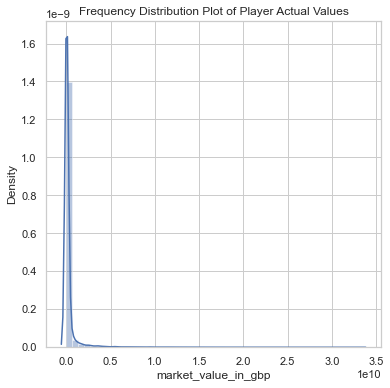

In [ ]:
x = player_list.market_value_in_gbp
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

# Top 11 Valuable Player

In [ ]:
player_list.nlargest(11,columns="market_value_in_gbp")[["Name","Age","goals","position","sub_position","minutes_played","market_value_in_gbp"]]

,Name,Age,goals,position,sub_position,minutes_played,market_value_in_gbp
9555,Kylian Mbappe,24,156,Attack,Centre-Forward,16820,3.326400e+10
12026,Mohamed Salah,30,194,Attack,Right Winger,28084,3.141000e+10
14583,Romelu Lukaku,29,175,Attack,Centre-Forward,26819,3.051000e+10
6726,Harry Kane,29,220,Attack,Centre-Forward,27305,2.952000e+10
2603,Bruno Fernandes,28,117,Midfield,Attacking Midfield,25719,2.713500e+10
13955,Raheem Sterling,28,130,Attack,Left Winger,26778,2.692800e+10
9197,Kevin De Bruyne,31,88,Midfield,Attacking Midfield,25894,2.664900e+10
6859,Heung Min Son,30,127,Attack,Left Winger,22768,2.390400e+10
2305,Bernardo Silva,28,67,Midfield,Attacking Midfield,24598,2.389500e+10
14849,Sadio Mane,30,134,Attack,Left Winger,25670,2.340000e+10


# View the correlations

In [ ]:
corr_mat = player_list.corr()
corr_mat

,Age,player_id,last_season,goals,assists,market_value_in_gbp,highest_market_value_in_gbp,minutes_played,yellow_cards,red_cards
Age,1.000000,-0.853182,-0.473766,0.096652,0.100886,-0.057893,0.033531,0.238127,0.212342,0.123792
player_id,-0.853182,1.000000,0.392313,-0.154182,-0.181492,-0.011175,-0.097975,-0.322806,-0.273667,-0.143472
last_season,-0.473766,0.392313,1.000000,0.235201,0.282345,0.190727,0.201860,0.400444,0.333526,0.170455
goals,0.096652,-0.154182,0.235201,1.000000,0.759202,0.504839,0.628319,0.557552,0.417730,0.198777
assists,0.100886,-0.181492,0.282345,0.759202,1.000000,0.524681,0.645871,0.676140,0.544371,0.230597
market_value_in_gbp,-0.057893,-0.011175,0.190727,0.504839,0.524681,1.000000,0.859451,0.470054,0.333701,0.145507
highest_market_value_in_gbp,0.033531,-0.097975,0.201860,0.628319,0.645871,0.859451,1.000000,0.582716,0.424916,0.193820
minutes_played,0.238127,-0.322806,0.400444,0.557552,0.676140,0.470054,0.582716,1.000000,0.820009,0.416888
yellow_cards,0.212342,-0.273667,0.333526,0.417730,0.544371,0.333701,0.424916,0.820009,1.000000,0.438417
red_cards,0.123792,-0.143472,0.170455,0.198777,0.230597,0.145507,0.193820,0.416888,0.438417,1.000000


# Heatmap of correlation values

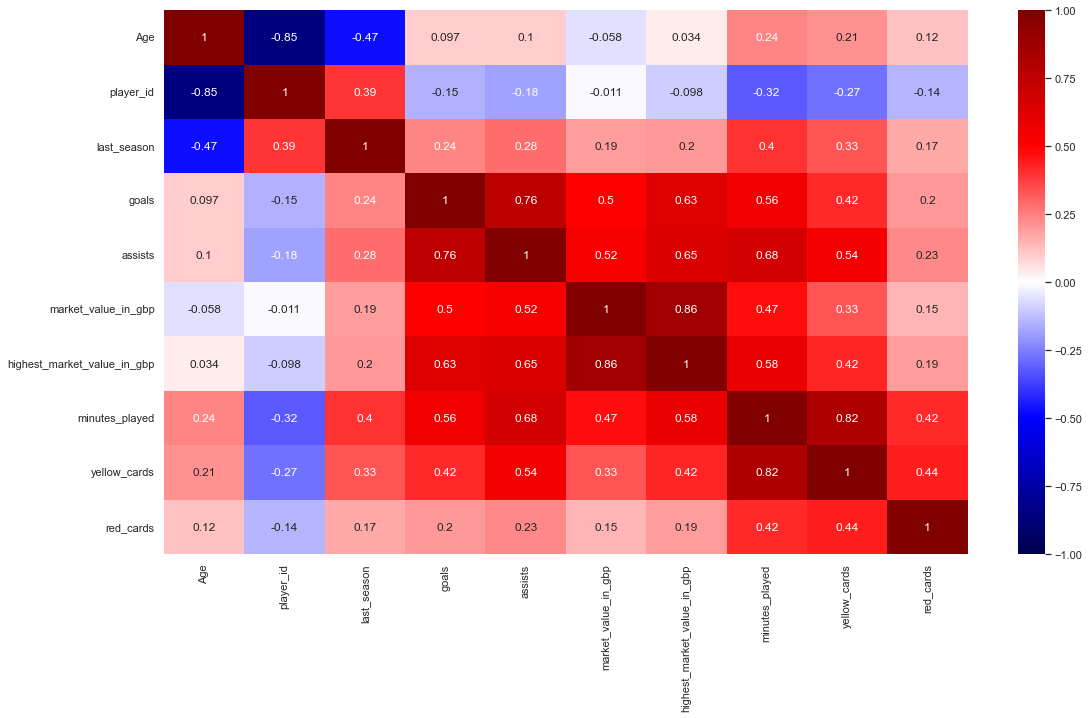

In [ ]:
plt.figure(1, figsize=(18, 10))
sns.set(style="whitegrid")
sns.heatmap(corr_mat, cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0);
plt.show()

# Model based on most selected columns

In [ ]:
X1= player_list.loc[:,['Age','assists','yellow_cards','red_cards', 'minutes_played','highest_market_value_in_gbp']]
y1= player_list.loc[:,"market_value_in_gbp"]
player_model1 = sm.OLS(y1, X1, data=player_list)
results1 = player_model1.fit()
print(results1.summary());

                                 OLS Regression Results                                 
Dep. Variable:     market_value_in_gbp   R-squared (uncentered):                   0.751
Model:                             OLS   Adj. R-squared (uncentered):              0.751
Method:                  Least Squares   F-statistic:                              8962.
Date:                 Tue, 12 Apr 2022   Prob (F-statistic):                        0.00
Time:                         19:09:09   Log-Likelihood:                     -3.8816e+05
No. Observations:                17823   AIC:                                  7.763e+05
Df Residuals:                    17817   BIC:                                  7.764e+05
Df Model:                            6                                                  
Covariance Type:             nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------

# Splitting data into train, test and validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X1,y1, test_size=.25, random_state=10)

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_val)
mse = np.mean((pred-y_val)**2)

print(lr.score(X_test,y_test))
print(mse)
print(lr.coef_)

0.8044338889746534
3.776429153222936e+17
[-2.05879355e+07 -6.59810733e+06  9.15752086e+04 -2.92444807e+07
  3.91984985e+03  5.04263779e-01]


# What coefficients our regression model has chosen

In [ ]:
regressor = LinearRegression()
regressor.fit(X1,y1)
coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])
coeff_df.sort_values("Coefficient",ascending=False)

,Coefficient
minutes_played,2.965015e+03
highest_market_value_in_gbp,5.181157e-01
yellow_cards,-1.057956e+06
assists,-6.300191e+06
red_cards,-1.874718e+07
Age,-2.056025e+07


# Prediction on all data and calculate difference between tha actual value and predicted value

In [ ]:
y_pred = regressor.predict(X1)
df = pd.DataFrame({'Name':player_list.Name,'Actual': y1, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
df_under

,Actual,Predicted,Difference
Name,,,
Philippe Coutinho,4.779000e+09,2.031491e+10,-1.553591e+10
Eden Hazard,4.730400e+09,2.005736e+10,-1.532696e+10
Luis Suarez,3.222000e+09,1.422471e+10,-1.100271e+10
Sergio Busquets,3.110400e+09,1.406434e+10,-1.095394e+10
Lionel Messi,2.041200e+10,3.058249e+10,-1.017049e+10
Christian Eriksen,4.293000e+09,1.440387e+10,-1.011087e+10
Ivan Rakitic,2.494800e+09,1.254075e+10,-1.004595e+10
Isco,2.405700e+09,1.215461e+10,-9.748907e+09
Antoine Griezmann,1.728000e+10,2.638377e+10,-9.103766e+09


In [ ]:
df_over

,Actual,Predicted,Difference
Name,,,
Leon Goretzka,1.543500e+10,7.807968e+09,7.627032e+09
Bernardo Silva,2.389500e+10,1.620783e+10,7.687171e+09
Mikel Oyarzabal,1.713600e+10,8.703990e+09,8.432010e+09
Marquinhos,1.869750e+10,9.693955e+09,9.003545e+09
Marcus Rashford,2.080800e+10,1.054331e+10,1.026469e+10
Heung Min Son,2.390400e+10,1.351354e+10,1.039046e+10
Joshua Kimmich,2.226150e+10,1.178925e+10,1.047225e+10
Kylian Mbappe,3.326400e+10,2.119201e+10,1.207199e+10
Bruno Fernandes,2.713500e+10,1.348768e+10,1.364732e+10


# Plot the comparision of Actual and Predicted Values for Over Predicted

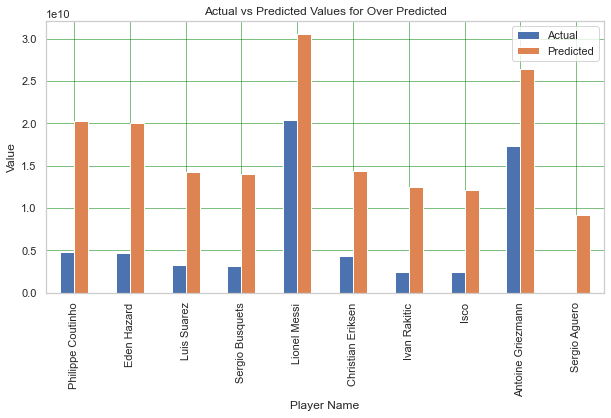

In [ ]:
df_under[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Over Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

# Plot the comparision of Actual and Predicted Values for under Predicted

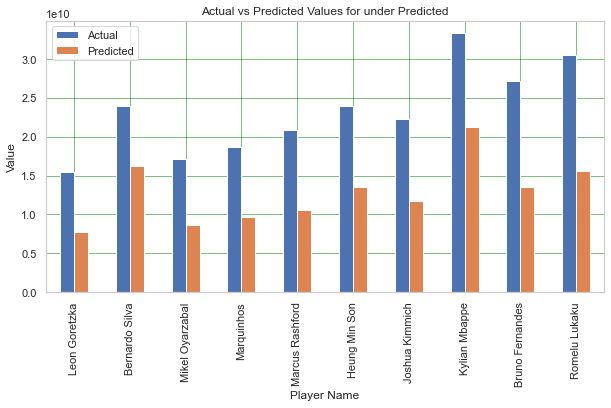

In [ ]:
df_over[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for under Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

# Calculating MAE, MSE, RMSE and R^2 values of our model

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1, y_pred)))
print('Linear Regression R^2:',regressor.score(X1,y1))

Mean Absolute Error: 218344882.78296986
Mean Squared Error: 4.71150004644331e+17
Root Mean Squared Error: 686403674.7019432
Linear Regression R^2: 0.747228846456097
